### NAME: DO ANH TUAN
### ID: 11226687
### CLASS: DSEB 64A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
food = pd.read_csv('/Users/doanhtuan137/Downloads/menu-nutrition-food.csv')
drink = pd.read_csv('/Users/doanhtuan137/Downloads/menu-nutrition-drink.csv')

# 1. DATA CLEANING

### 1.1 CLEANING DRINK

In [3]:
drink.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

### Xoá khoảng trắng ở tên của một số cột 

In [5]:
drink.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)


In [6]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total_Fat_(g)            242 non-null    object 
 5   Trans_Fat_(g)            242 non-null    float64
 6   Saturated_Fat_(g)        242 non-null    float64
 7   Sodium_(mg)              242 non-null    int64  
 8   Total_Carbohydrates_(g)  242 non-null    int64  
 9   Cholesterol_(mg)         242 non-null    int64  
 10  Dietary_Fibre_(g)        242 non-null    int64  
 11  Sugars_(g)               242 non-null    int64  
 12  Protein_(g)              242 non-null    float64
 13  Vitamin_A_(%_DV)         242 non-null    object 
 14  Vitamin_C_(%_DV)         2

### Đưa xác cột % về dạng số.

In [7]:
drink[['Iron_(%_DV)', 'Calcium_(%_DV)', 'Vitamin_C_(%_DV)', 'Vitamin_A_(%_DV)']] = drink[['Iron_(%_DV)', 'Calcium_(%_DV)', 'Vitamin_C_(%_DV)', 'Vitamin_A_(%_DV)']].apply(lambda x: x.str.rstrip('%').astype(float))

### Cột Caffeine_(mg) có 1 phần tử null, xoá row đó đi vì so với 242 thì 1 phần tử null không ảnh hưởng nhiều

In [8]:
drink.dropna(inplace=True)
drink.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        241 non-null    object 
 1   Beverage                 241 non-null    object 
 2   Beverage_prep            241 non-null    object 
 3   Calories                 241 non-null    int64  
 4   Total_Fat_(g)            241 non-null    object 
 5   Trans_Fat_(g)            241 non-null    float64
 6   Saturated_Fat_(g)        241 non-null    float64
 7   Sodium_(mg)              241 non-null    int64  
 8   Total_Carbohydrates_(g)  241 non-null    int64  
 9   Cholesterol_(mg)         241 non-null    int64  
 10  Dietary_Fibre_(g)        241 non-null    int64  
 11  Sugars_(g)               241 non-null    int64  
 12  Protein_(g)              241 non-null    float64
 13  Vitamin_A_(%_DV)         241 non-null    float64
 14  Vitamin_C_(%_DV)         241 no

### Đưa các cột 'Total_Fat_(g)', 'Caffeine_(mg)' về dạng số, sửa một số phần tử cho đúng format

In [9]:
drink['Total_Fat_(g)'] = drink['Total_Fat_(g)'].str.replace(' ', '.', regex=False).replace('\.+', '.', regex=True).astype(float)

mode_value = drink['Caffeine_(mg)'].mode().iloc[0]
drink['Caffeine_(mg)'] = drink['Caffeine_(mg)'].str.replace('Varies', mode_value).replace('varies', mode_value).astype(float)

### Ghép tên 3 cột Beverage_category, Beverage, Beverage_prep thành 1 cột Full_Name 

In [10]:
drink['Full_Name'] = drink['Beverage_category'] + '-' + drink['Beverage'] + ' - ' + drink['Beverage_prep']
drink = drink.drop(columns=['Beverage_category', 'Beverage', 'Beverage_prep'])
new_columns = ['Full_Name'] + [col for col in drink.columns if col != 'Full_Name']
drink = drink[new_columns]

In [11]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Full_Name                241 non-null    object 
 1   Calories                 241 non-null    int64  
 2   Total_Fat_(g)            241 non-null    float64
 3   Trans_Fat_(g)            241 non-null    float64
 4   Saturated_Fat_(g)        241 non-null    float64
 5   Sodium_(mg)              241 non-null    int64  
 6   Total_Carbohydrates_(g)  241 non-null    int64  
 7   Cholesterol_(mg)         241 non-null    int64  
 8   Dietary_Fibre_(g)        241 non-null    int64  
 9   Sugars_(g)               241 non-null    int64  
 10  Protein_(g)              241 non-null    float64
 11  Vitamin_A_(%_DV)         241 non-null    float64
 12  Vitamin_C_(%_DV)         241 non-null    float64
 13  Calcium_(%_DV)           241 non-null    float64
 14  Iron_(%_DV)              241 no

# 1.2. CLEANING FOOD

In [12]:
food.head()

,Unnamed: 0,Calories,Fat,Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5000.0 mg,50,3,12
1,8-Grain Roll,380,6000.0 mg,70,7,10
2,Almond Croissant,410,22000.0 mg,45,3,10
3,Apple Fritter,460,23000.0 mg,56,2,7
4,Banana Nut Bread,420,22000.0 mg,52,2,6


In [13]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    113 non-null    object
 1    Calories     113 non-null    int64 
 2    Fat          113 non-null    object
 3    Carb. (g)    113 non-null    int64 
 4    Fiber (g)    113 non-null    int64 
 5    Protein (g)  113 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.4+ KB


### Xoá khoảng trắng ở tên một số cột

In [14]:
food.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed:_0   113 non-null    object
 1   Calories     113 non-null    int64 
 2   Fat          113 non-null    object
 3   Carb._(g)    113 non-null    int64 
 4   Fiber_(g)    113 non-null    int64 
 5   Protein_(g)  113 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.4+ KB


### Đổi tên cột unnamed thành tên món ăn, thêm đơn vị vào cột fat

In [15]:
food = food.rename(columns={'Unnamed:_0' : 'Full_Name', 'Fat' : 'Fat_(g)'})


### Đưa đơn vị cột Fat về gram để giống các cột khác


In [16]:
food['Fat_(g)'] = food['Fat_(g)'].str.rstrip(' mg').astype(float) 
food['Fat_(g)'] = food['Fat_(g)'] / 1000

# 2. TRẢ LỜI CÁC CÂU HỎI


### 2.1 Which drink contains the most caffeine (sugar, calcium, vitamin C)?

In [17]:
drink[drink['Caffeine_(mg)'] == drink['Caffeine_(mg)'].max()]

,Full_Name,Calories,Total_Fat_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Total_Carbohydrates_(g),Cholesterol_(mg),Dietary_Fibre_(g),Sugars_(g),Protein_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
3,Coffee-Brewed Coffee - Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0


In [18]:
drink[drink['Sugars_(g)'] == drink['Sugars_(g)'].max()]

,Full_Name,Calories,Total_Fat_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Total_Carbohydrates_(g),Cholesterol_(mg),Dietary_Fibre_(g),Sugars_(g),Protein_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
214,Frappuccino® Blended Coffee-Java Chip (Without...,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10.0,0.0,20.0,35.0,145.0
215,Frappuccino® Blended Coffee-Java Chip (Without...,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6.0,0.0,15.0,35.0,145.0


In [19]:
drink[drink['Calcium_(%_DV)'] == drink['Calcium_(%_DV)'].max()]

,Full_Name,Calories,Total_Fat_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Total_Carbohydrates_(g),Cholesterol_(mg),Dietary_Fibre_(g),Sugars_(g),Protein_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
83,Signature Espresso Drinks-White Chocolate Moch...,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25.0,2.0,60.0,2.0,150.0
84,Signature Espresso Drinks-White Chocolate Moch...,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20.0,4.0,60.0,2.0,150.0
85,Signature Espresso Drinks-White Chocolate Moch...,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15.0,2.0,60.0,20.0,150.0
127,Tazo® Tea Drinks-Tazo® Green Tea Latte - Venti...,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30.0,20.0,60.0,6.0,110.0
129,Tazo® Tea Drinks-Tazo® Green Tea Latte - Soymilk,390,8.0,1.0,0.0,0,180,64,4,58,14.0,20.0,20.0,60.0,30.0,110.0


In [20]:
drink[drink['Vitamin_C_(%_DV)'] == drink['Vitamin_C_(%_DV)'].max()]

,Full_Name,Calories,Total_Fat_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Total_Carbohydrates_(g),Cholesterol_(mg),Dietary_Fibre_(g),Sugars_(g),Protein_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
178,Smoothies-Strawberry Banana Smoothie - Grande ...,290,1.0,0.3,0.0,5,125,58,7,41,16.0,4.0,100.0,10.0,8.0,0.0
179,Smoothies-Strawberry Banana Smoothie - 2% Milk,290,2.0,1.0,0.0,5,125,58,7,41,16.0,4.0,100.0,10.0,8.0,0.0
180,Smoothies-Strawberry Banana Smoothie - Soymilk,290,2.0,0.4,0.0,5,120,58,8,40,16.0,2.0,100.0,10.0,8.0,0.0


### 2.2 Which food contains the most fiber?

In [21]:
food[food['Fiber_(g)'] == food['Fiber_(g)'].max()]

,Full_Name,Calories,Fat_(g),Carb._(g),Fiber_(g),Protein_(g)
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23


### 2.3 Visualize the top 20 highest-calorie items on Starbucks’ menu. Provide comments.

In [22]:
mapping = {'Fat_(g)' : 'Total_Fat_(g)', 
           'Carb._(g)': 'Total_Carbohydrates_(g)', 
           'Fiber_(g)' : 'Dietary_Fibre_(g)'}
food = food.rename(mapper = mapping,axis=1)
food

,Full_Name,Calories,Total_Fat_(g),Total_Carbohydrates_(g),Dietary_Fibre_(g),Protein_(g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
...,...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1


In [23]:
df = pd.concat([food, drink], ignore_index=True)
df.head()

,Full_Name,Calories,Total_Fat_(g),Total_Carbohydrates_(g),Dietary_Fibre_(g),Protein_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Cholesterol_(mg),Sugars_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
0,Chonga Bagel,300,5.0,50,3,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8-Grain Roll,380,6.0,70,7,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Almond Croissant,410,22.0,45,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Fritter,460,23.0,56,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Banana Nut Bread,420,22.0,52,2,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
top_20_calories = df.sort_values('Calories', ascending=False)
top_20_calories = top_20_calories.head(10)
top_20_calories 

,Full_Name,Calories,Total_Fat_(g),Total_Carbohydrates_(g),Dietary_Fibre_(g),Protein_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Cholesterol_(mg),Sugars_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Green Goddess Avocado Salad,620,37.0,62,10,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Strawberries & Jam Sandwich,600,25.0,80,10,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Turkey Pesto Panini,560,23.0,55,3,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Turkey & Fire-Roasted Corn Salad,560,29.0,53,7,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Seared Steak & Cheddar Sandwich,530,29.0,44,2,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,PB&J Protein Box,520,26.0,53,5,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Chicken Artichoke on Ancient Grain Flatbread,510,27.0,37,5,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
top_20_calories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 102 to 97
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Full_Name                10 non-null     object 
 1   Calories                 10 non-null     int64  
 2   Total_Fat_(g)            10 non-null     float64
 3   Total_Carbohydrates_(g)  10 non-null     int64  
 4   Dietary_Fibre_(g)        10 non-null     int64  
 5   Protein_(g)              10 non-null     float64
 6   Trans_Fat_(g)            0 non-null      float64
 7   Saturated_Fat_(g)        0 non-null      float64
 8   Sodium_(mg)              0 non-null      float64
 9   Cholesterol_(mg)         0 non-null      float64
 10  Sugars_(g)               0 non-null      float64
 11  Vitamin_A_(%_DV)         0 non-null      float64
 12  Vitamin_C_(%_DV)         0 non-null      float64
 13  Calcium_(%_DV)           0 non-null      float64
 14  Iron_(%_DV)              0 non-

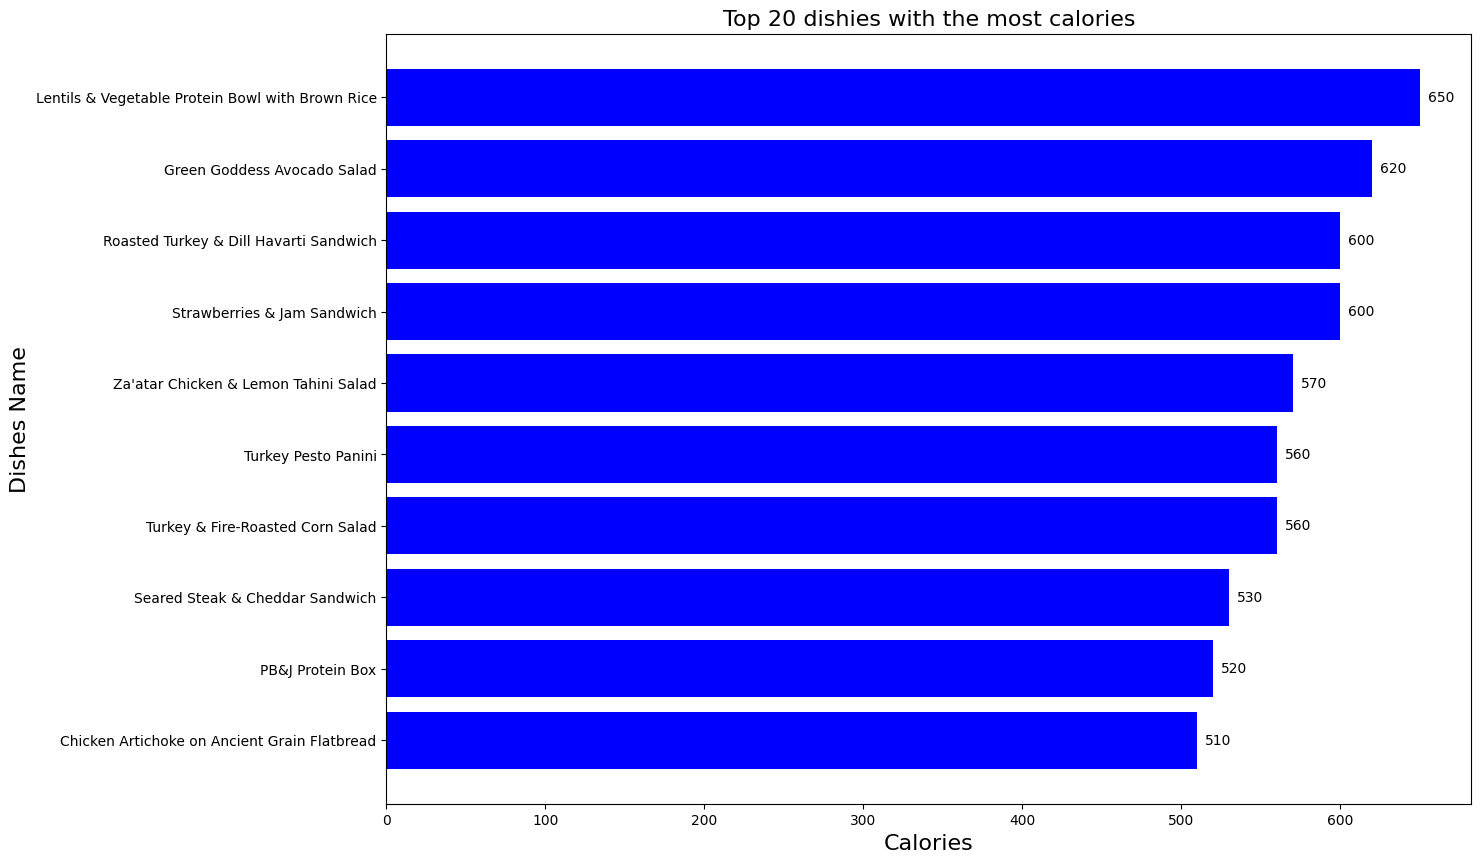

In [26]:

fig, ax = plt.subplots(figsize=(14, 10))

bars = ax.barh(top_20_calories['Full_Name'], top_20_calories['Calories'], color='blue')

ax.set_title('Top 20 dishies with the most calories', fontsize=16)
ax.set_xlabel('Calories', fontsize=16)
ax.set_ylabel('Dishes Name', fontsize=16)

# Sắp xếp từ cao tới thấp
ax.invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2, str(int(width)),
            ha='left', va='center')

plt.show()

1. Các món như salad, sandwich và bát protein xuất hiện nhiều nhất, cho thấy người tiêu dùng thường ưa chuộng món chính hơn so với đồ uống hoặc món tráng miệng.

2. "Lentils & Vegetable Protein Bowl with Brown Rice" dẫn đầu về lượng calo với 650 calo, nhấn mạnh rằng ngay cả những món được xem là lành mạnh vẫn có thể chứa nhiều calo.

3. Chỉ có một loại đồ uống trong danh sách là "Signature Espresso Drinks-White Chocolate Mocha (Without Whipped Cream) - 2% Milk", với 510 calo, cho thấy đồ uống cũng có thể góp phần đáng kể vào lượng calo hàng ngày.

4. Nhiều món ăn sáng phổ biến như sandwich trứng và thịt xông khói chiếm một phần lớn, phản ánh thói quen của người tiêu dùng đối với các món ăn sáng này.

5. Một số món tráng miệng như "Double Chocolate Chunk Brownie" và "Chocolate Marble Loaf Cake" xuất hiện, nhưng không chiếm đa số trong danh sách.


In [27]:
top_20_fat = df.sort_values('Total_Fat_(g)', ascending=False).head(20)
top_20_fat

,Full_Name,Calories,Total_Fat_(g),Total_Carbohydrates_(g),Dietary_Fibre_(g),Protein_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Cholesterol_(mg),Sugars_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
61,Green Goddess Avocado Salad,620,37.0,62,10,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Spicy Chorizo Monterey Jack & Egg Breakfast S...,500,30.0,35,3,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Farmers' Market Protein Box,470,29.0,29,4,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Turkey & Fire-Roasted Corn Salad,560,29.0,53,7,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Seared Steak & Cheddar Sandwich,530,29.0,44,2,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Sausage Cheddar & Egg Breakfast Sandwich,500,28.0,41,1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Double Chocolate Chunk Brownie,490,28.0,55,3,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Smoked Mozzarella & Roasted Pepper Sandwich,500,28.0,46,4,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


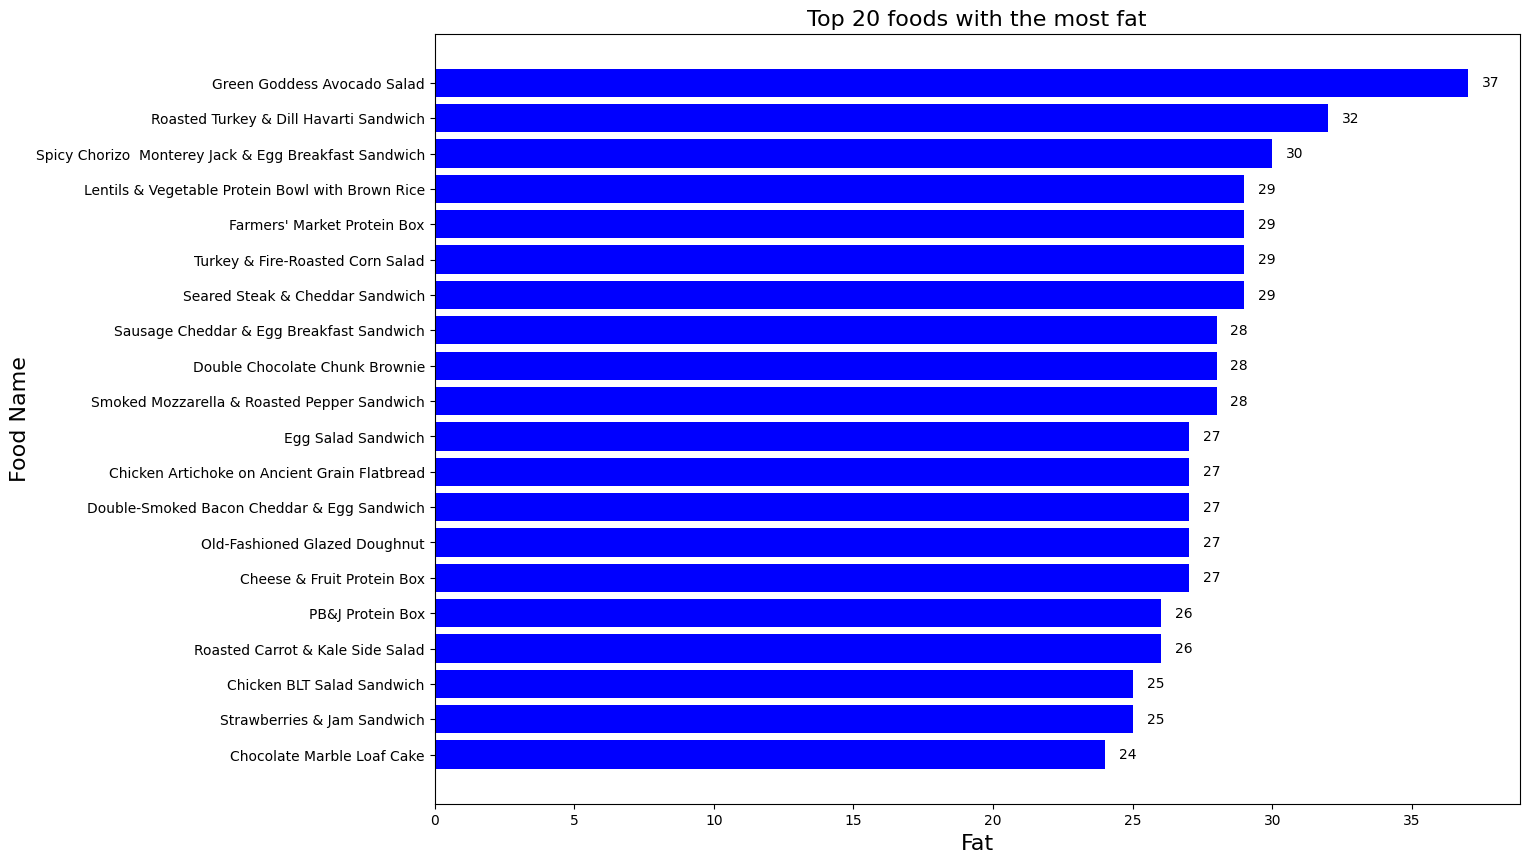

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))

bars = ax.barh(top_20_fat['Full_Name'], top_20_fat['Total_Fat_(g)'], color='blue')

ax.set_title('Top 20 foods with the most fat', fontsize=16)
ax.set_xlabel('Fat', fontsize=16)
ax.set_ylabel('Food Name', fontsize=16)

# Sắp xếp từ cao tới thấp
ax.invert_yaxis()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)),
            ha='left', va='center')

plt.show()

1. Món có nhiều chất béo nhất: "Green Goddess Avocado Salad" đứng đầu với 37g chất béo, điều này gây bất ngờ vì salad thường được xem là lựa chọn ít béo cho người ăn kiêng.

2. Phạm vi chất béo: Lượng chất béo trong các món ăn trong danh sách dao động từ 24g đến 37g, cho thấy sự khác biệt lớn giữa các món.

3. Món ăn lành mạnh cũng có nhiều chất béo: Các món được xem là lành mạnh như salad và bát protein cũng nằm trong danh sách này, nhấn mạnh rằng không phải món "healthy" nào cũng ít chất béo.

4. Sandwich chiếm số lượng lớn: Nhiều loại sandwich, đặc biệt là sandwich bữa sáng, chiếm ưu thế trong danh sách.

5. Món tráng miệng: Một số món tráng miệng như "Double Chocolate Chunk Brownie" và "Chocolate Marble Loaf Cake" có mặt trong danh sách, nhưng không nhiều bằng các món ăn chính.

6. Hộp protein: Các loại hộp protein như "Farmers' Market Protein Box", "Cheese & Fruit Protein Box", và "PB&J Protein Box" xuất hiện, cho thấy chúng cũng có hàm lượng chất béo đáng kể.

7. Thiếu đồ uống: Không có món đồ uống nào lọt vào top 20, cho thấy các món ăn thường có nhiều chất béo hơn so với đồ uống tại Starbucks.

### 2.5 Visualize the top 20 highest-fiber items on Starbucks’ menu. Provide comments.

In [29]:
top_20_fiber = df.sort_values('Dietary_Fibre_(g)', ascending=False).head(20)
top_20_fiber

,Full_Name,Calories,Total_Fat_(g),Total_Carbohydrates_(g),Dietary_Fibre_(g),Protein_(g),Trans_Fat_(g),Saturated_Fat_(g),Sodium_(mg),Cholesterol_(mg),Sugars_(g),Vitamin_A_(%_DV),Vitamin_C_(%_DV),Calcium_(%_DV),Iron_(%_DV),Caffeine_(mg)
102,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Strawberries & Jam Sandwich,600,25.0,80,10,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Green Goddess Avocado Salad,620,37.0,62,10,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Chicken & Quinoa Protein Bowl with Black Beans...,420,17.0,42,9,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,Smoothies-Strawberry Banana Smoothie - Soymilk,290,2.0,120,8,16.0,0.4,0.0,5.0,58.0,40.0,2.0,100.0,10.0,8.0,0.0
33,Multigrain Bagel,350,4.0,64,8,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,Smoothies-Strawberry Banana Smoothie - 2% Milk,290,2.0,125,7,16.0,1.0,0.0,5.0,58.0,41.0,4.0,100.0,10.0,8.0,0.0
64,Roasted Carrot & Kale Side Salad,440,26.0,44,7,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Sprouted Grain Vegan Bagel,330,6.0,57,7,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


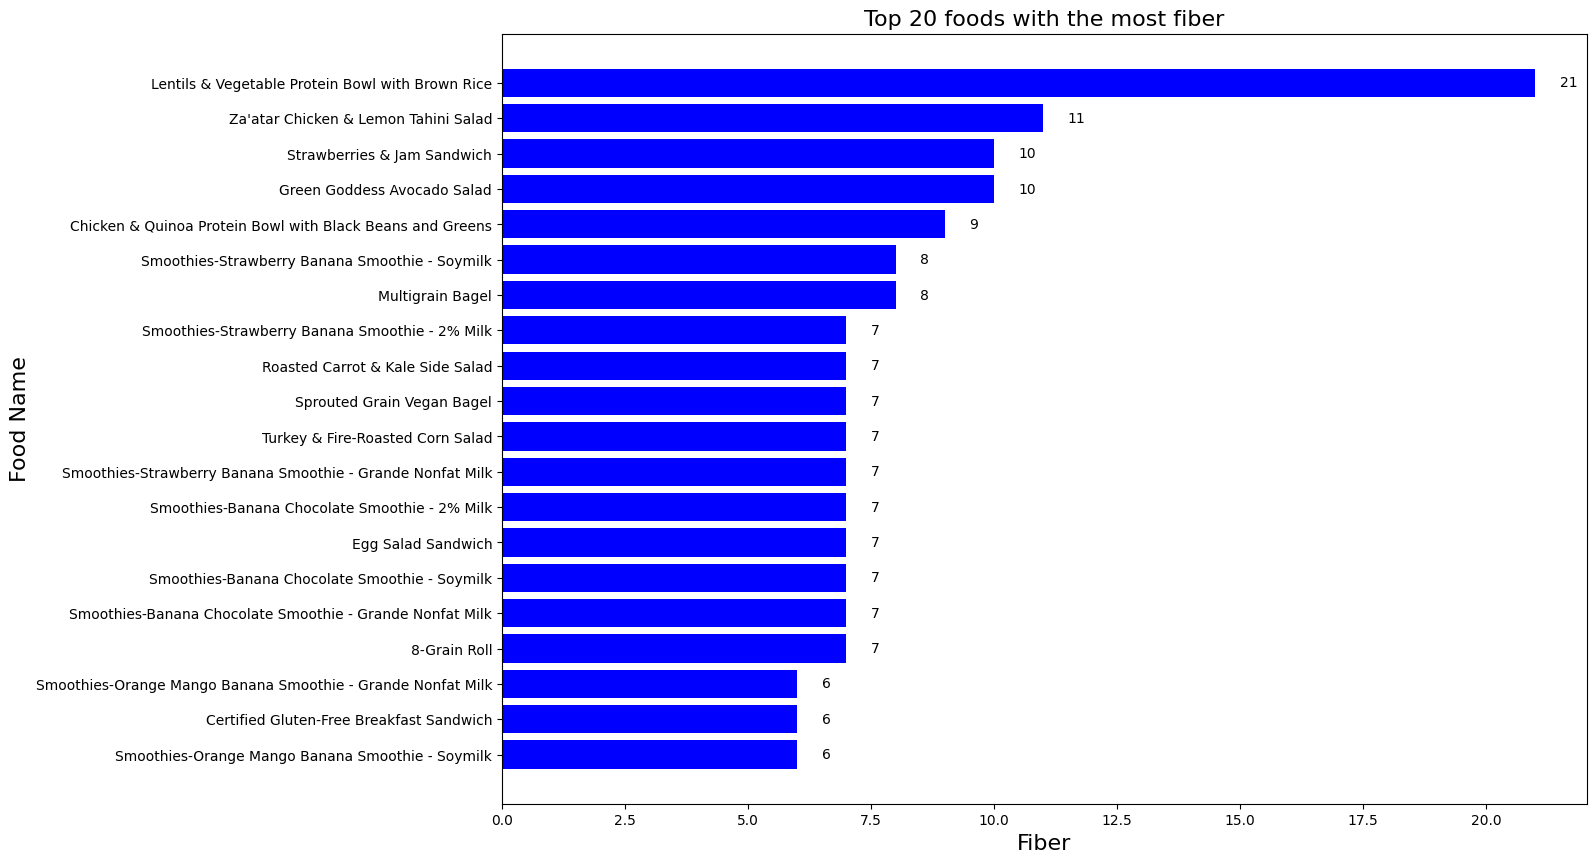

In [30]:
fig, ax = plt.subplots(figsize=(14, 10))

bars = ax.barh(top_20_fiber['Full_Name'], top_20_fiber['Dietary_Fibre_(g)'], color='blue')

ax.set_title('Top 20 foods with the most fiber', fontsize=16)
ax.set_xlabel('Fiber', fontsize=16)
ax.set_ylabel('Food Name', fontsize=16)

# Sắp xếp từ cao tới thấp
ax.invert_yaxis()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)),
            ha='left', va='center')

plt.show()